<a href="https://colab.research.google.com/github/SamuelBrand97/Deep-Learning/blob/main/Convolutional_Neural_Network(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONEXION CON DRIVE - LECTURA DE DATASET

In [3]:
# Conexión con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CREACION DATASET

In [4]:
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pathlib
import cv2

In [5]:
PATH = "/content/drive/MyDrive/12MIAR_Proyecto_Final/data/train" # <- Replace this path with your location!!!
PATH = pathlib.Path(PATH)
number_img = len(list(PATH.glob('*/*.jpg'))) 
print("The number of pictures are:",number_img) 

The number of pictures are: 3777


(750, 1280, 3)


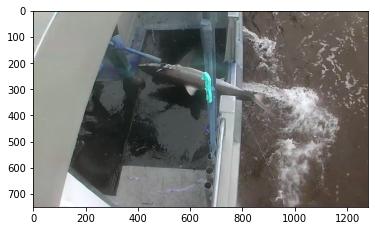

In [7]:
shark = list(PATH.glob('SHARK/*'))
img = cv2.imread(str(shark[0]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

There are pictures with diferents dimensions, is necesary that the images have the same dimension, on the other side, to reduce the computacional cost is 
appropriate to select a small dimension, 128 x 128 was selected. <br>
"image_dataset_from_directory" is ideal in these kind of situations where the categories are saved in diferents folders in these case, we have 8 folders inside of main folder "train". On the other hand, is useful to create a train and test dataset, reshape images and convert the data to tensor shape.

In [8]:
img_height = 128
img_width = 128

train = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=number_img)

test = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=number_img)

Found 3777 files belonging to 8 classes.
Using 3022 files for training.
Found 3777 files belonging to 8 classes.
Using 755 files for validation.


Now, We are going to extract the train and test dataset with images (x) and labels (y).

In [9]:
for image_batch, labels_batch in train:
  x_train = image_batch.numpy()
  y_train = labels_batch.numpy()
for image_batch, labels_batch in test:
  x_test = image_batch.numpy()
  y_test = labels_batch.numpy()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3022, 128, 128, 3)
(3022,)
(755, 128, 128, 3)
(755,)


# **3. DATASET INSPECTION**

In [12]:
classes = train.class_names
print(classes)

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']


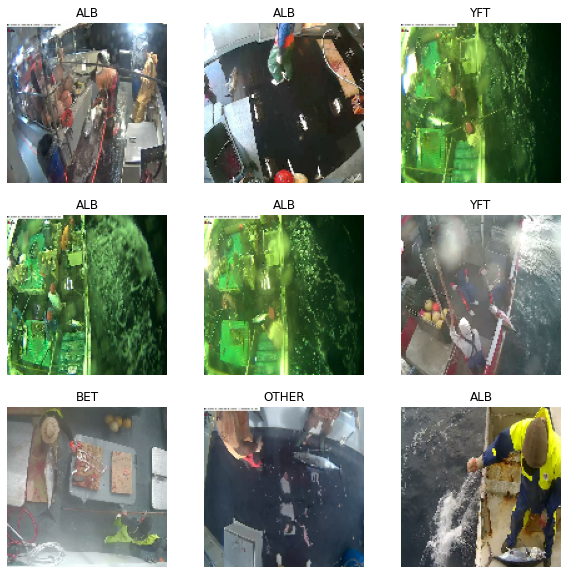

In [23]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 10)) 
for i in range(9):
  j = random.randint(0,3021)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x_train[j].astype("uint8"))
  plt.title(classes[y_train[j]])
  plt.axis("off")

In [24]:
#Se normaliza a fin de disminuir costo computacional
x_tr, x_tst = x_train / 255.0, x_test / 255.0

# **4. MODEL EVALUATION**

In [25]:
import matplotlib.pyplot as plt
import numpy as np
# Muestro gráfica de accuracy y losses

def evaluacion(ajuste,epocas):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epocas), ajuste.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epocas), ajuste.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epocas), ajuste.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epocas), ajuste.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.ylim([0, 2])
  plt.legend()

In [27]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test

def evaluacion1(modelo, BATCH):
  print("Evaluando red neuronal...")
  predictions = modelo.predict(x_tst, batch_size=BATCH)
  print(classification_report(y_test, predictions.argmax(axis=1)))

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def matriz_confusion(modelo, BATCH):
  predictions = modelo.predict(x_tst, batch_size=BATCH)
  predicciones = []
  for i in predictions:
    predicciones.append(i.argmax(axis=0))
  cm = confusion_matrix(y_test, predicciones)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
  fig, ax = plt.subplots(figsize=(8, 8))
  disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='Blues')
  plt.title("Matriz de Confusión")
  plt.show()

# **5. TRAINING FROM SCRATCH**

In [66]:
# Librerias necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
# Red feedforward API secuencial
model = Sequential()

# BASE MODEL
model.add(layers.Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2))) 

#model.add(layers.Conv2D(64,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))

#model.add(layers.Conv2D(128,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))

#model.add(layers.Conv2D(512,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))

#TOP MODEL
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(8,activation='softmax')) #Capa de activiación con igual número de neuronas que categorias

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 127008)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                8128576   
                                                                 
 dense_7 (Dense)             (None, 8)                 520       
                                                                 
Total params: 8,129,992
Trainable params: 8,129,992
Non-trainable params: 0
____________________________________________

In [68]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [69]:
epocas = 10
H = model.fit(x_tr, y_train, epochs=epocas, batch_size=128, validation_split = 0.1) 

Epoch 1/10
22/22 [==============================] - 30s 1s/step - loss: 5.3844 - accuracy: 0.3218 - val_loss: 1.5892 - val_accuracy: 0.4785
Epoch 2/10
22/22 [==============================] - 29s 1s/step - loss: 1.2933 - accuracy: 0.6054 - val_loss: 1.0488 - val_accuracy: 0.6436
Epoch 3/10
22/22 [==============================] - 32s 1s/step - loss: 0.7871 - accuracy: 0.7510 - val_loss: 0.8208 - val_accuracy: 0.7426
Epoch 4/10
22/22 [==============================] - 30s 1s/step - loss: 0.5314 - accuracy: 0.8562 - val_loss: 0.5757 - val_accuracy: 0.8416
Epoch 5/10
19/22 [========================>.....] - ETA: 4s - loss: 0.3443 - accuracy: 0.9104

KeyboardInterrupt: ignored

Evaluando red neuronal...
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       338
           1       0.94      0.89      0.92        37
           2       0.96      0.93      0.94        27
           3       1.00      0.73      0.84        11
           4       0.99      0.88      0.93        93
           5       0.97      0.94      0.96        68
           6       0.94      1.00      0.97        29
           7       0.97      0.91      0.94       152

    accuracy                           0.94       755
   macro avg       0.96      0.91      0.93       755
weighted avg       0.95      0.94      0.94       755



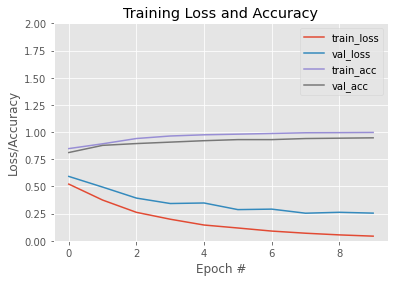

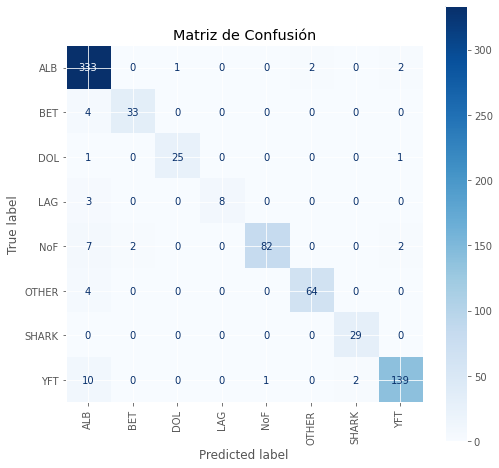

In [44]:
BATCH = 128
evaluacion(H,epocas)
evaluacion1(model, BATCH)
matriz_confusion(model, BATCH)

In [48]:
test_loss, test_acc = model.evaluate(x_tst,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

24/24 - 3s - loss: 0.2326 - accuracy: 0.9444 - 3s/epoch - 141ms/step

Test accuracy: 0.9443708658218384


In [50]:
predictions = model.predict(x_tst)
predictions[3]

array([9.9797350e-01, 2.3689008e-05, 6.7173855e-06, 4.3513819e-07,
       1.6503516e-03, 1.3594290e-04, 1.1624664e-04, 9.3056486e-05],
      dtype=float32)

In [51]:
np.argmax(predictions[3])

0

In [52]:
y_test[0]

0

In [59]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(8))
  plt.yticks([])
  thisplot = plt.bar(range(8), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

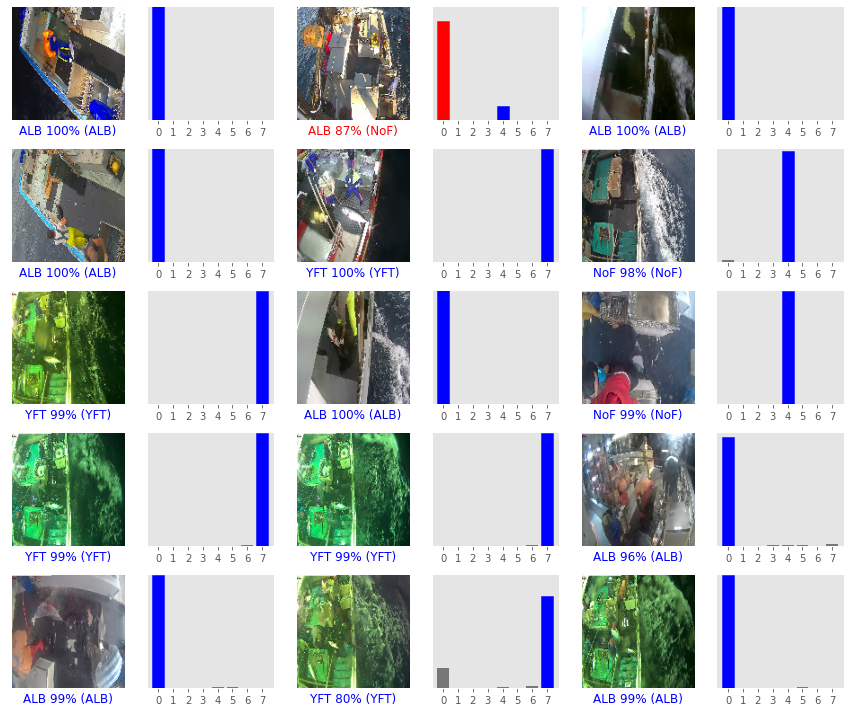

In [60]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_tst)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()